# In this notebook:

1. Simple **Counting Tokens**
2. Visualising **Frequency Distributions** (but first, **cleaning up the data**)
3. Advanced visualisation: **Wordclouds**
4. Frequency-related similarity

# 1. Counting Tokens

#### Questions & Objectives:

- How can I count tokens in text?

#### Key Points

- To count tokens, one can make use of NLTK’s FreqDist class from the probability package. The N() method can then be used to count how many tokens a text or corpus contains.
- Counts for a specific token can be obtained using fdist["token"].

check documentory for more examples on ``FreqDist`` http://www.nltk.org/book/ch01.html#frequency-distributions

In [1]:
import nltk
from nltk.probability import FreqDist

In [2]:
textmc = 'Twinkle, twinkle, little star, How I wonder what you are, Up above the world so high, Like a diamond in the sky, twinkle, twinkle, little star, How I wonder what you are.'
textmc = textmc.lower()
textmc_token = nltk.word_tokenize(textmc)
print(textmc_token)

['twinkle', ',', 'twinkle', ',', 'little', 'star', ',', 'how', 'i', 'wonder', 'what', 'you', 'are', ',', 'up', 'above', 'the', 'world', 'so', 'high', ',', 'like', 'a', 'diamond', 'in', 'the', 'sky', ',', 'twinkle', ',', 'twinkle', ',', 'little', 'star', ',', 'how', 'i', 'wonder', 'what', 'you', 'are', '.']


In [3]:
len(textmc_token)

42

In [4]:
len(set(textmc_token))

22

In [5]:
fdist = FreqDist(textmc_token)

In [6]:
len(fdist)

22

In [7]:
vocab1 = fdist.keys()
print(vocab1)

dict_keys(['twinkle', ',', 'little', 'star', 'how', 'i', 'wonder', 'what', 'you', 'are', 'up', 'above', 'the', 'world', 'so', 'high', 'like', 'a', 'diamond', 'in', 'sky', '.'])


In [8]:
list(vocab1)[:5]

['twinkle', ',', 'little', 'star', 'how']

In [9]:
fdist

FreqDist({',': 9, 'twinkle': 4, 'little': 2, 'star': 2, 'how': 2, 'i': 2, 'wonder': 2, 'what': 2, 'you': 2, 'are': 2, ...})

In [10]:
# freq of a specific word
fdist['twinkle']

4

In [11]:
# tokens with more than 1 characters and appear at least twice
freqwords = [w for w in vocab1 if len(w) > 1 and fdist[w] >= 2]
freqwords

['twinkle', 'little', 'star', 'how', 'wonder', 'what', 'you', 'are', 'the']

In [12]:
# the most common tokens
fdist.most_common(5)

[(',', 9), ('twinkle', 4), ('little', 2), ('star', 2), ('how', 2)]

## 2. Visualising **Frequency Distributions**

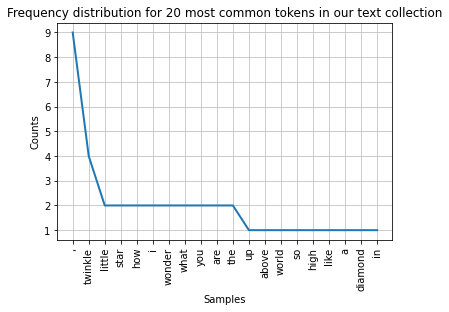

<AxesSubplot:title={'center':'Frequency distribution for 20 most common tokens in our text collection'}, xlabel='Samples', ylabel='Counts'>

In [13]:
fdist.plot(20,title='Frequency distribution for 20 most common tokens in our text collection')

## 3. Visualising **WordCloud**

You should consider upgrading via the 'c:\users\andre\anaconda3\python.exe -m pip install --upgrade pip' command.


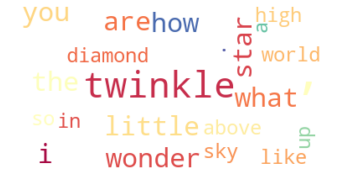

In [15]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_font_size=60,background_color='white', colormap = 'Spectral').generate_from_frequencies(fdist)
#plt.figure(figsize=(10,10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 4.Frequency-related similarity


Note that frequcncies can be also used to find 'similar' words in the text 
``Text.similar()`` and ``ContextIndex.similar_words(word)``

The ``text.similar()`` method takes a word w, finds all contexts *w1ww2*, then finds all words *w'* that appear in the same context, i.e. *w1w'w2*.
``ContextIndex.similar_words()`` calculates the similarity score for each word as the sum of the products of frequencies in each context.

Also see https://www.nltk.org/book_1ed/ch05.html and https://www.nltk.org/_modules/nltk/text.html

In [16]:
# take the brown corpus for example
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('girl',num=5) #num=5 is used to specify the number of words to generate 

similar_words = text._word_context_index.similar_words('girl')
print(' '.join(similar_words))

man way boy day time
man world time fact door house way president in woman day boy war room city road people country church year
